# Introduction to Pandas

Pandas (http://pandas.pydata.org) is great for data analysis, again we met it briefly in the software carpentry course, but it's worth revisiting. 

Note the book on that website - 'Python for data analysis', this is a useful text which much of this section was drawn from. 

We're also going to look at how we might use pandas to work with data read in with CIS.

In [1]:
import pandas as pd

## Series

A `Series` is essentially a container for series data (think time-series, but more general).

Let's create a basic time-series:

In [2]:
from datetime import datetime
s = pd.Series([0.13, 0.21, 0.15, 'NaN', 0.29, 0.09, 0.24, -10], dtype='f',
                 index = [datetime(2015,11,16,15,41,23), datetime(2015,11,16,15,42,22), datetime(2015,11,16,15,43,25), datetime(2015,11,16,15,44,20), datetime(2015,11,16,15,45,22),
                          datetime(2015,11,16,15,46,23), datetime(2015,11,16,15,47,26), datetime(2015,11,16,15,48,21)])
print(s)

2015-11-16 15:41:23     0.13
2015-11-16 15:42:22     0.21
2015-11-16 15:43:25     0.15
2015-11-16 15:44:20      NaN
2015-11-16 15:45:22     0.29
2015-11-16 15:46:23     0.09
2015-11-16 15:47:26     0.24
2015-11-16 15:48:21   -10.00
dtype: float32


As you can see, it's dealt with our missing value nicely - this is one of the nice things about Pandas.

We can get rid of the negative value easily as well:

In [3]:
s = s[s>0]
print(s)

2015-11-16 15:41:23    0.13
2015-11-16 15:42:22    0.21
2015-11-16 15:43:25    0.15
2015-11-16 15:45:22    0.29
2015-11-16 15:46:23    0.09
2015-11-16 15:47:26    0.24
dtype: float32


Note this also got rid of our NaN (as NaN comparisons are always negative)

Now, as you probably noticed, I added a lot of datetimes to this data which represent the timings of the measurements. Pandas uses these times as an `index` on the data, and gives us access to some very powerful tools.

For example, resampling our data to a minutely average is easy:

In [4]:
s.resample('5min').max()

2015-11-16 15:40:00    0.21
2015-11-16 15:45:00    0.29
Freq: 5T, dtype: float32

Another way of creating series is using dictionaries:

In [5]:
colours = pd.Series({'Blue': 42, 'Green': 12, 'Yellow': 37})
colours

Blue      42
Green     12
Yellow    37
dtype: int64

We can index Series just like numpy arrays, or using the named index:

In [6]:
print(colours[1])
print(colours[:-1])
print(colours['Blue'])

12
Blue     42
Green    12
dtype: int64
42


Or both:

In [7]:
print(colours[1:]['Green'])

12


Another nice benefit of the indices is in data allignment. So for example when performing operations on two series, Pandas will line up the indices first:

In [8]:
more_colours = pd.Series({'Blue': 16, 'Red': 22, 
                          'Purple': 34, 'Green': 25,})

more_colours + colours

Blue      58.0
Green     37.0
Purple     NaN
Red        NaN
Yellow     NaN
dtype: float64

As you can see, if not both of the indices are present then Pandas will return NaNs.

Pandas uses numpy heavily underneath, so many of the numpy array operations work on Series as well:

In [9]:
colours.mean(), colours.max()

(30.333333333333332, 42)

## DataFrames

Data frames are essentially collections of Series, with a shared index. Each `column` of data is labelled and the whole frame can be pictured as a table, or spreadsheet of data.

In [10]:
df = pd.DataFrame({'First': colours, 'Second': more_colours})
print(df)

        First  Second
Blue     42.0    16.0
Green    12.0    25.0
Purple    NaN    34.0
Red       NaN    22.0
Yellow   37.0     NaN


And can be indexed by row, or index via the ix attribute:

In [11]:
# Column by index
print(df['First'])

Blue      42.0
Green     12.0
Purple     NaN
Red        NaN
Yellow    37.0
Name: First, dtype: float64


In [12]:
# Column as attribute
print(df.First)

Blue      42.0
Green     12.0
Purple     NaN
Red        NaN
Yellow    37.0
Name: First, dtype: float64


In [ ]:
# Row via ix
print(df.ix['Blue'])

We can then apply many of the same numpy functions on this data, on a per column basis:

In [13]:
df.max()

First     42.0
Second    34.0
dtype: float64

In [14]:
df.sum()

First     91.0
Second    97.0
dtype: float64

## Reading Excel/CSV files

In [15]:
example_csv = pd.read_csv('../resources/B1_mosquito_data.csv', 
                          parse_dates=True, index_col=0)
example_csv[0:10]

,temperature,rainfall,mosquitos
year,,,
1960-01-01,87,270,122
1961-01-01,77,296,116
1962-01-01,87,281,117
1963-01-01,73,167,87
1964-01-01,79,166,91
1965-01-01,76,272,113
1966-01-01,77,140,87
1967-01-01,87,207,106
1968-01-01,86,266,115


In [16]:
example_csv.corr()

,temperature,rainfall,mosquitos
temperature,1.000000,0.137805,0.408380
rainfall,0.137805,1.000000,0.948906
mosquitos,0.408380,0.948906,1.000000


## Using Pandas with CIS data

We can easily convert CIS data into pandas data to take advantage of this time-series functionality.

In [17]:
from cis import read_data_list

aerosol_cci_collocated = read_data_list('col_output.nc', '*')

cis_df = aerosol_cci_collocated.as_data_frame()
cis_df

,altitude,latitude,longitude,AOD670,time,AOD550,AOD870,AOD1600,NUMBER_CONCENTRATION
2008-04-11 20:01:30,233.4,64.8029,-147.8828,0.284781,149120.834375,0.270871,0.130443,0.284781,2191.0
2008-04-11 20:02:30,652.9,64.7594,-147.9471,0.294635,149120.835069,0.279516,0.133261,0.294635,581.0
2008-04-11 20:03:30,1099.1,64.7385,-148.0415,0.345198,149120.835764,0.328403,0.158271,0.345198,306.0
2008-04-11 20:04:30,1496.7,64.7820,-148.1129,0.391794,149120.836458,0.379837,0.196193,0.391794,281.0
2008-04-11 20:05:30,1877.5,64.8434,-148.1207,0.443872,149120.837153,0.432696,0.227793,0.443872,246.0
2008-04-11 20:06:30,2245.8,64.9073,-148.1275,0.520862,149120.837847,0.514773,0.283677,0.520862,230.0
2008-04-11 20:07:30,2638.7,64.9720,-148.1360,0.489666,149120.838542,0.483544,0.265761,0.489666,241.0
2008-04-11 20:08:30,3013.7,65.0354,-148.1538,0.265527,149120.839236,0.260520,0.140179,0.265527,197.0
2008-04-11 20:09:30,3275.1,65.1007,-148.1691,0.416466,149120.839931,0.407154,0.216467,0.416466,209.0
2008-04-11 20:10:30,3411.1,65.1700,-148.1806,0.397496,149120.840625,0.387216,0.203360,0.397496,194.0


In [18]:
# Now we can do cool Pandas stuff!
cis_df.ix[cis_df['NUMBER_CONCENTRATION'].argmin()]

altitude                  2916.100000
latitude                    73.281700
longitude                 -153.326600
AOD670                            NaN
time                    149121.992708
AOD550                            NaN
AOD870                            NaN
AOD1600                           NaN
NUMBER_CONCENTRATION        17.000000
Name: 2008-04-12 23:49:30, dtype: float64

In [19]:
cis_short = cis_df.dropna()

In [20]:
cis_short.ix[cis_short['NUMBER_CONCENTRATION'].argmin()]

altitude                  2587.800000
latitude                    65.139400
longitude                 -147.897000
AOD670                       0.565450
time                    149121.878125
AOD550                       0.566969
AOD870                       0.326906
AOD1600                      0.565450
NUMBER_CONCENTRATION       139.000000
Name: 2008-04-12 21:04:30, dtype: float64

## Exercise

In pairs, plot probability distributions (use kde) of the raw, 10 minutely and 2 hourly averaged number concentration

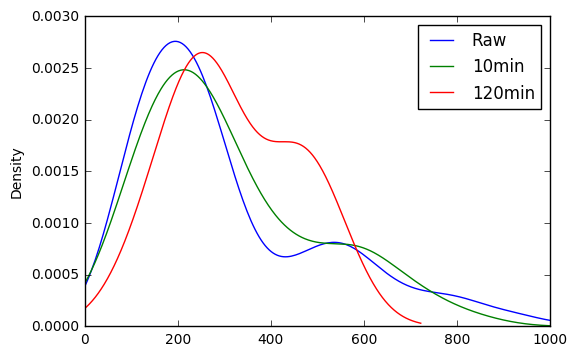

In [21]:
%matplotlib inline

cis_df['NUMBER_CONCENTRATION'].plot(kind='kde', xlim=[0,1000], label='Raw')
cis_df['NUMBER_CONCENTRATION'].resample('10min').mean().plot(kind='kde', label='10min')
ax=cis_df['NUMBER_CONCENTRATION'].resample('120min').mean().plot(kind='kde', label='120min')
ax.legend()

# Extras

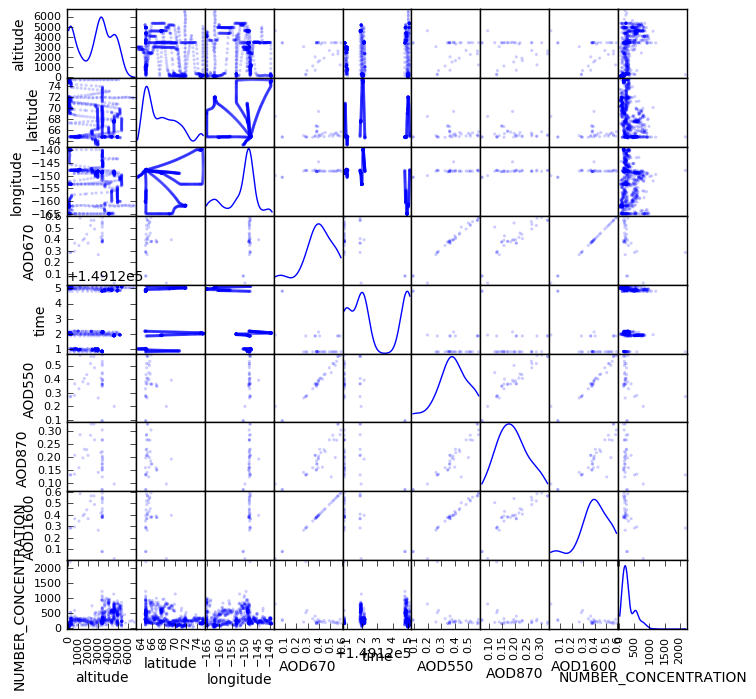

In [22]:
from pandas.tools.plotting import scatter_matrix
m = scatter_matrix(cis_df, alpha=0.2, figsize=(8, 8), diagonal='kde', edgecolors='none')